In [ ]:
# Hello!

# AS I have said before, the first procedure that I follow regarding data analysis is data exploration, aiming to 
# figure out what is in the dataset, and deciding what to do from that point on, always in accordance with the business 
# requirements, and of course, based on the best practices, and last but not least, based on norms, call it rules or even laws.

# In addition, we may want to check the type of data, make sure there are no missing values or duplicates and then we can 
# move forward in our analysis, let's say by applying some kind of calculation, for instance, statistics or more complex ones
# like machine learning algoritms. 

# The following analysis is very straightforward as well, I picked this one just to easily showcase my skills and allow others, 
# like recruiters, to take a quick look at my skills instead of leading them into complex examples that can take days to review 
# and evaluate.

# With that being said, I am glad to present my analysis of the Sakila Costumer who spend the most.

# Thank you.

# Alberto F. Hernanadez


In [ ]:
# The first step is to import some libraries like Pandas, Matplotlib Pyplot and NumPy.

# KLib is a package that allows me to speed up the steps that have to do with making sure there are no missing or 
# duplicate values.

In [1]:
import pandas as pd

In [2]:
import klib

In [3]:
import matplotlib.pyplot as plt

In [ ]:
# After importing the libraries, the next step will be to read the CSV file using Pandas as follows:

In [4]:
df = pd.read_csv("example20.csv")

In [ ]:
# Now, I want to get information about the data, which type of data the CSV file has, how many columns and rows it has, 
# as well as have an idea about the content of the columns taking into account the column names. 

# For this, I will use two pandas methods, the first one will be head(), and secondly I will use the info() method:

In [5]:
df.head()

customer_id first_name last_name          rental_date  SUM(payment.amount)
0          526       KARL      SEAL  2005-05-28 00:40:48              9969.75
1          148    ELEANOR      HUNT  2005-05-28 23:53:18              9960.84
2          144      CLARA      SHAW  2005-05-27 00:49:27              8214.36
3          137     RHONDA   KENNEDY  2005-05-30 12:13:52              7589.79
4          178     MARION    SNYDER  2005-06-15 09:03:52              7589.79

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          599 non-null    int64  
 1   first_name           599 non-null    object 
 2   last_name            599 non-null    object 
 3   rental_date          599 non-null    object 
 4   SUM(payment.amount)  599 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.5+ KB


In [ ]:
# Next, I will check for any dupplicate value in the dataset

In [7]:
df.duplicated().sum()

0

In [ ]:
# Now, I will check for any dupplicate value in the dataset again, but this time, I will do it using Klib as follows:

In [8]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [ ]:
# Okay, as you may see above, I got a confirmation from Klib that states there are not duplicate values in this dataset

In [ ]:
# Now let's create a new data frame, I will call this one "df_cleaned" and then I will instruct Klib to perform the cleaning 
# as follows:

In [9]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (599, 5)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [ ]:
# As you may see Klib told us if it made any changes on our dataset, it also told us that it did not drop any row or column 
# and it said as well that there were no missing values. So in this case, Klib did not make any change on our dataset. 

# Klib did all this with just one step, however, there should be taken into account that the data cleaning may require 
# the execution of something more complex depending on the business requirements.

# The following just shows us how the memory usage changed after the Klib cleanup. 

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         599 non-null    int16  
 1   first_name          599 non-null    string 
 2   last_name           599 non-null    string 
 3   rental_date         599 non-null    string 
 4   sum_payment_amount  599 non-null    Float32
dtypes: Float32(1), int16(1), string(3)
memory usage: 18.3 KB


In [ ]:
# For better understanding I will rename the column "sum_payment_amount", now it will be called "total_expended"

In [11]:
df_cleaned.rename(columns = {'sum_payment_amount':'total_expended'}, inplace = True)

In [ ]:
# Let's have a look at the data frame using the head() method from Pandas as follows:

In [12]:
df_cleaned.head()

customer_id first_name last_name          rental_date  total_expended
0          526       KARL      SEAL  2005-05-28 00:40:48         9969.75
1          148    ELEANOR      HUNT  2005-05-28 23:53:18     9960.839844
2          144      CLARA      SHAW  2005-05-27 00:49:27     8214.360352
3          137     RHONDA   KENNEDY  2005-05-30 12:13:52     7589.790039
4          178     MARION    SNYDER  2005-06-15 09:03:52     7589.790039

In [ ]:
# Now let's to take some extra precautions regarding duplicates values, let's check if there is any duplicate customer id

In [13]:
df_cleaned["customer_id"].duplicated().sum()

0

In [ ]:
# Next, I'll do the same check for duplicate values even though it may be considered normal to have one or more 
# customer with the same first name.

In [14]:
df_cleaned["first_name"].duplicated().sum()

8

In [ ]:
# Okay, I got 8 customers with the same first name in this data set, is not a problem.

In [ ]:
# The following may be an optional step, I just want to change the data type of the "customer_id" column

In [15]:
df_cleaned["customer_id"] = df_cleaned["customer_id"].astype('string')

In [ ]:
# Let's check the data type change on the "customer_id" column

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     599 non-null    string 
 1   first_name      599 non-null    string 
 2   last_name       599 non-null    string 
 3   rental_date     599 non-null    string 
 4   total_expended  599 non-null    Float32
dtypes: Float32(1), string(4)
memory usage: 21.8 KB


In [ ]:
# Okay, the previous cell looks good.

# Now I will add a column whose name will be "ranking _by_ expenditure", inside this new column I will assign a ranking of 
# every customer Sakila has.

In [17]:
df_cleaned["ranking_by_expenditure"]= df_cleaned["total_expended"].rank(ascending=False)

In [ ]:
# Let's have a look at the data frame using the head() method from Pandas as follows:

In [18]:
df_cleaned.head(15)

customer_id first_name last_name          rental_date  total_expended  \
0          526       KARL      SEAL  2005-05-28 00:40:48         9969.75   
1          148    ELEANOR      HUNT  2005-05-28 23:53:18     9960.839844   
2          144      CLARA      SHAW  2005-05-27 00:49:27     8214.360352   
3          137     RHONDA   KENNEDY  2005-05-30 12:13:52     7589.790039   
4          178     MARION    SNYDER  2005-06-15 09:03:52     7589.790039   
5          236     MARCIA      DEAN  2005-05-26 15:46:56     7374.359863   
6          469     WESLEY      BULL  2005-05-26 03:07:43          7104.0   
7          459      TOMMY   COLLAZO  2005-05-24 22:54:33     7091.560059   
8          468        TIM      CARY  2005-05-25 17:17:04     6848.790039   
9          176       JUNE   CARROLL  2005-05-26 03:17:42     6424.310059   
10          75      TAMMY   SANDERS  2005-05-26 04:46:23     6379.189941   
11         410     CURTIS      IRBY  2005-06-15 22:57:34     6369.560059   
12         197        SUE    PETERS  2005-05-25 16:03:42          6184.0   
13         295      DAISY     BATES  2005-05-27 08:08:18     6179.560059   
14         181        ANA   BRADLEY  2005-05-28 11:19:23     5938.439941   

    ranking_by_expenditure  
0                      1.0  
1                      2.0  
2                      3.0  
3                      4.5  
4                      4.5  
5                      6.0  
6                      7.0  
7                      8.0  
8                      9.0  
9                     10.0  
10                    11.0  
11                    12.0  
12                    13.0  
13                    14.0  
14                    15.0

In [ ]:
# Okay, as you may see above, Pandas made the ranking, now I want to sort out the ranking values as follows:

In [19]:
df_cleaned.sort_values("ranking_by_expenditure", ascending=True).head(12)

customer_id first_name last_name          rental_date  total_expended  \
0          526       KARL      SEAL  2005-05-28 00:40:48         9969.75   
1          148    ELEANOR      HUNT  2005-05-28 23:53:18     9960.839844   
2          144      CLARA      SHAW  2005-05-27 00:49:27     8214.360352   
3          137     RHONDA   KENNEDY  2005-05-30 12:13:52     7589.790039   
4          178     MARION    SNYDER  2005-06-15 09:03:52     7589.790039   
5          236     MARCIA      DEAN  2005-05-26 15:46:56     7374.359863   
6          469     WESLEY      BULL  2005-05-26 03:07:43          7104.0   
7          459      TOMMY   COLLAZO  2005-05-24 22:54:33     7091.560059   
8          468        TIM      CARY  2005-05-25 17:17:04     6848.790039   
9          176       JUNE   CARROLL  2005-05-26 03:17:42     6424.310059   
10          75      TAMMY   SANDERS  2005-05-26 04:46:23     6379.189941   
11         410     CURTIS      IRBY  2005-06-15 22:57:34     6369.560059   

    ranking_by_expenditure  
0                      1.0  
1                      2.0  
2                      3.0  
3                      4.5  
4                      4.5  
5                      6.0  
6                      7.0  
7                      8.0  
8                      9.0  
9                     10.0  
10                    11.0  
11                    12.0

In [ ]:
# Perfect, we got it! now let's put this in a new dataframe just to have everything in an identifiable dataframe. 
# I will name the new data frame "df_ranking_sorted"

In [20]:
df_ranking_sorted = df_cleaned.sort_values("ranking_by_expenditure", ascending=True)

In [ ]:
# The following is the outcome of the execution of the head() method that shows us the first 5 rows out of all the columns
# the "df_ranking_sorted" data frame has.  

# As you may see below, now there is a ranking based on the expenditure of every Sakila customer.

In [21]:
df_ranking_sorted.head() 

customer_id first_name last_name          rental_date  total_expended  \
0         526       KARL      SEAL  2005-05-28 00:40:48         9969.75   
1         148    ELEANOR      HUNT  2005-05-28 23:53:18     9960.839844   
2         144      CLARA      SHAW  2005-05-27 00:49:27     8214.360352   
3         137     RHONDA   KENNEDY  2005-05-30 12:13:52     7589.790039   
4         178     MARION    SNYDER  2005-06-15 09:03:52     7589.790039   

   ranking_by_expenditure  
0                     1.0  
1                     2.0  
2                     3.0  
3                     4.5  
4                     4.5

In [ ]:
# Now when thinking about visualization, It may be unnecessary to visualize all the raking.

# let's say we want to get to know the top 10 customer who spend the most.

# Okay, in my opinion, one easy approach is to query every customer who ranked between number 1 one as well as the customer 
# ranked at position number 10, including rank 1 and 10. 

# I did the following

In [22]:
df_top_ten_customers_by_expenditure = df_ranking_sorted.query("ranking_by_expenditure<=10") 

In [ ]:
# Now let's see who are the top 10 customer who spend the most by executing the head() method for 11 rows.

In [23]:
df_top_ten_customers_by_expenditure.head(11)

customer_id first_name last_name          rental_date  total_expended  \
0         526       KARL      SEAL  2005-05-28 00:40:48         9969.75   
1         148    ELEANOR      HUNT  2005-05-28 23:53:18     9960.839844   
2         144      CLARA      SHAW  2005-05-27 00:49:27     8214.360352   
3         137     RHONDA   KENNEDY  2005-05-30 12:13:52     7589.790039   
4         178     MARION    SNYDER  2005-06-15 09:03:52     7589.790039   
5         236     MARCIA      DEAN  2005-05-26 15:46:56     7374.359863   
6         469     WESLEY      BULL  2005-05-26 03:07:43          7104.0   
7         459      TOMMY   COLLAZO  2005-05-24 22:54:33     7091.560059   
8         468        TIM      CARY  2005-05-25 17:17:04     6848.790039   
9         176       JUNE   CARROLL  2005-05-26 03:17:42     6424.310059   

   ranking_by_expenditure  
0                     1.0  
1                     2.0  
2                     3.0  
3                     4.5  
4                     4.5  
5                     6.0  
6                     7.0  
7                     8.0  
8                     9.0  
9                    10.0

In [ ]:
# The next cells contains the producedures for getting a visualization of the outcome of the sakila customer who spend the most.

In [ ]:
# Important:

# Keep in mind that in order to visually represent our data we need to determine which graph is best suited for our analysis
# and this will depend on several things, for example, the audience, the purpose/goal and the actions/results we hope to get 
# from the audience by showing them our chart.

# In my opinion, it is equally important to take into account the type of data we have, let's say numeric, categorical or 
# ordinal so that the graph can communicate the message and obtain the expected results.

In [ ]:
# For these analyses, I will be using a bar chart, so let's define the values for X and Y as follows:

In [24]:
x = df_top_ten_customers_by_expenditure["total_expended"]/1000

In [25]:
y = df_top_ten_customers_by_expenditure["first_name"]

In [ ]:
# Now I am going to configure the bar graph, save it and print it, as follows:

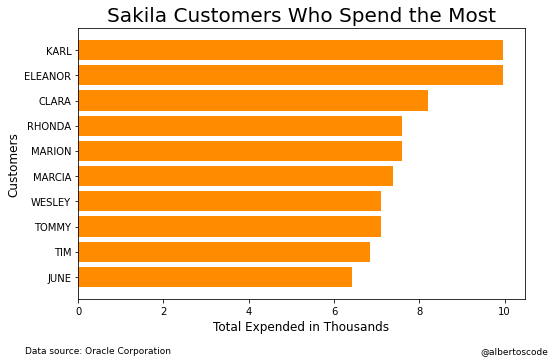

In [26]:
figure, ax = plt.subplots(figsize=(8, 5))

ax.barh(y, x, color = "darkorange")

ax.invert_yaxis()

ax.set_xlabel("Total Expended in Thousands", fontsize=12)

ax.set_ylabel("Customers", fontsize=12)

ax.set_title("Sakila Customers Who Spend the Most", fontsize=20)

plt.annotate('Data source: Oracle Corporation',
            xy = (-0.12, -0.20),
            xycoords='axes fraction',
            fontsize=9)

plt.annotate('@albertoscode',
            xy = (.90, -0.20),
            xycoords='axes fraction',
            fontsize=9)

plt.savefig("sakilaCustomers.jpg", dpi=150,bbox_inches='tight')

plt.show()

In [ ]:
# And that's it

# Thank you very much again!

# Best regards,

# Alberto F. Hernandez